In [9]:
# URL 문자열 소문자화 + 공백 제거 후 중복 제거
df['url_clean'] = df['url'].str.strip().str.lower()
df = df.drop_duplicates(subset=['url_clean'])
df = df.reset_index(drop=True)


df_unique = df.drop_duplicates(subset=['url'])
df_unique = df.drop_duplicates(subset=['important_info'])
df_unique = df.drop_duplicates(subset=['title'])

In [10]:
# str을 리스트로 변환하는 함수 정의의
def try_literal_eval(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return x  # 변환 실패 시 원본 반환
    else:
        return x  # 이미 리스트 등 객체인 경우 그대로 반환

df['sales_ranks'] = df['sales_ranks'].apply(try_literal_eval)


In [11]:
# 2. 첫 번째 딕셔너리에서 category와 rank 추출해서 각각 category_1, rank_1 컬럼 생성
df['category_1'] = df['sales_ranks'].apply(lambda x: x[0]['category'] if len(x) > 0 else None)
df['rank_1'] = df['sales_ranks'].apply(lambda x: x[0]['rank'] if len(x) > 0 else None)

# 3. 두 번째 딕셔너리에서 category와 rank 추출해서 각각 category_2, rank_2 컬럼 생성
df['category_2'] = df['sales_ranks'].apply(lambda x: x[1]['category'] if len(x) > 1 else None)
df['rank_2'] = df['sales_ranks'].apply(lambda x: x[1]['rank'] if len(x) > 1 else None)

In [12]:
print(df['category_1'].unique())
print(df['category_2'].unique())
# 배열을 깔끔한 정수형으로 보기
values_1 = df['rank_1'].unique()       # 예: df['rank'] 또는 df['category_1']
values_1 = values_1[~np.isnan(values_1)] # NaN 제거 (필요시)
values_1 = values_1.astype(int)        # 정수형으로 변환
print(df[df['rank_1'].isin(values_1)]['rank_1'].head())



values_2 = df['rank_2'].unique()       # 예: df['rank'] 또는 df['category_1']
values_2 = values_2[~np.isnan(values_2)] # NaN 제거 (필요시)
values_2 = values_2.astype(int)        # 정수형으로 변환
print(df[df['rank_2'].isin(values_2)]['rank_2'].head())

# 카테고리1 안에서 각 항목의 비율이 어느정도인가 추출해보자.
# 카테고리2 비율을 구해서 데이터에 대한 판단을 해보자.

['건강 및 가정' None '피부미용 및 퍼스널 케어' '애완동물 용품' '식료품 및 고급 요리']
['멀티 비타민 보충제' '멀티 비타민-미네랄 컴비네이션 보충제' '멀티 미네랄 미네랄 보충제' '칼슘 미네랄 보충제'
 '비타민 D 보충제' '철분 미네랄 보충제' '루테인 영양 보충제' '카로티노이드 영양 보충제' '마그네슘 미네랄 보충제'
 '아연 미네랄 보충제' '미량 미네랄 보충제' '구리 미네랄 보충제' '셀레늄 미네랄 보충제' '갑상선 추출물 영양 보충제'
 '망간 미네랄 보충제' '스포츠 영양 제품' None '크롬 미네랄 보충제' '계피 허브 보충제' '비타민, 미네랄 및 영양제'
 '디톡스 및 클렌징 체중 감량 제품' '스포츠 영양 인내력 및 에너지 보충제' '비타민 B2 보충제' '비타민 B9 보충제'
 '복합 효소 영양 보충제' '비타민 B3 보충제' '비타민 B12 보충제' '비타민 B6 보충제' '비타민 B 복합체 보충제'
 '비타민 B1 보충제' '비타민 A 보충제' '베타 카로틴 영양 보충제' '비타민 B5 보충제' '비타민 E 보충제'
 '비타민 K1 보충제' '비타민 보충제' '비타민 C 보충제' '비타민 B7 보충제' '발모 트리트먼트' '나트륨 미네랄 보충제'
 '칼륨 미네랄 보충제' '지질 영양 보충제' '콜린 비타민 보충제' '여성 헬스 케어 용품' '스포츠 영양 전해질 대체 음료'
 '프리바이오틱 영양 보충제' '분지사슬아미노산 영양 보충제' '-HTP 영양 보충제' '아세틸-엘-카르니틴 영양 보충제'
 '항산화제 컴비네이션 영양 보충제' '허브 보충제' '아미노산 영양 보충제' '엘-라이신 영양 보충제'
 '스포츠 영양 인내력 및 에너지 파우더' '스포츠 영양 운동 후 및 회복 제품' '허브 및 영양 수면 보조제'
 '수면 및 코골이 보조 도구' '엘-글루타민 영양 보충제' '판매 및 거래' '부신 추출물 영양 보충제' '빌베리 허브 보충제'
 '리코펜 영양 보충제' '말 비타민 및 미네랄' '폐경기 약품 및 치료' 

In [17]:
df = df[df['category_1'] != '애완동물 용품']
df = df[df['category_1'] != '식료품 및 고급 요리']
df = df[df['category_1'] != '피부미용 및 퍼스널 케어']

df.to_csv('processed_data.csv', index=False, encoding='utf-8-sig')

In [14]:
df['sales_rank_1'] = df.apply(lambda row: {'category': row['category_1'], 'rank': row['rank_1']}, axis=1)
df['sales_rank_2'] = df.apply(lambda row: {'category': row['category_2'], 'rank': row['rank_2']}, axis=1)

print(df['sales_rank_1'].head())
print(df['sales_rank_2'].head())

0     {'category': '건강 및 가정', 'rank': 361.0}
1    {'category': '건강 및 가정', 'rank': 3114.0}
2     {'category': '건강 및 가정', 'rank': 151.0}
3    {'category': '건강 및 가정', 'rank': 5994.0}
4      {'category': '건강 및 가정', 'rank': 44.0}
Name: sales_rank_1, dtype: object
0              {'category': '멀티 비타민 보충제', 'rank': 7.0}
1    {'category': '멀티 비타민-미네랄 컴비네이션 보충제', 'rank': 3...
2          {'category': '멀티 미네랄 미네랄 보충제', 'rank': 1.0}
3            {'category': '멀티 비타민 보충제', 'rank': 132.0}
4              {'category': '멀티 비타민 보충제', 'rank': 1.0}
Name: sales_rank_2, dtype: object


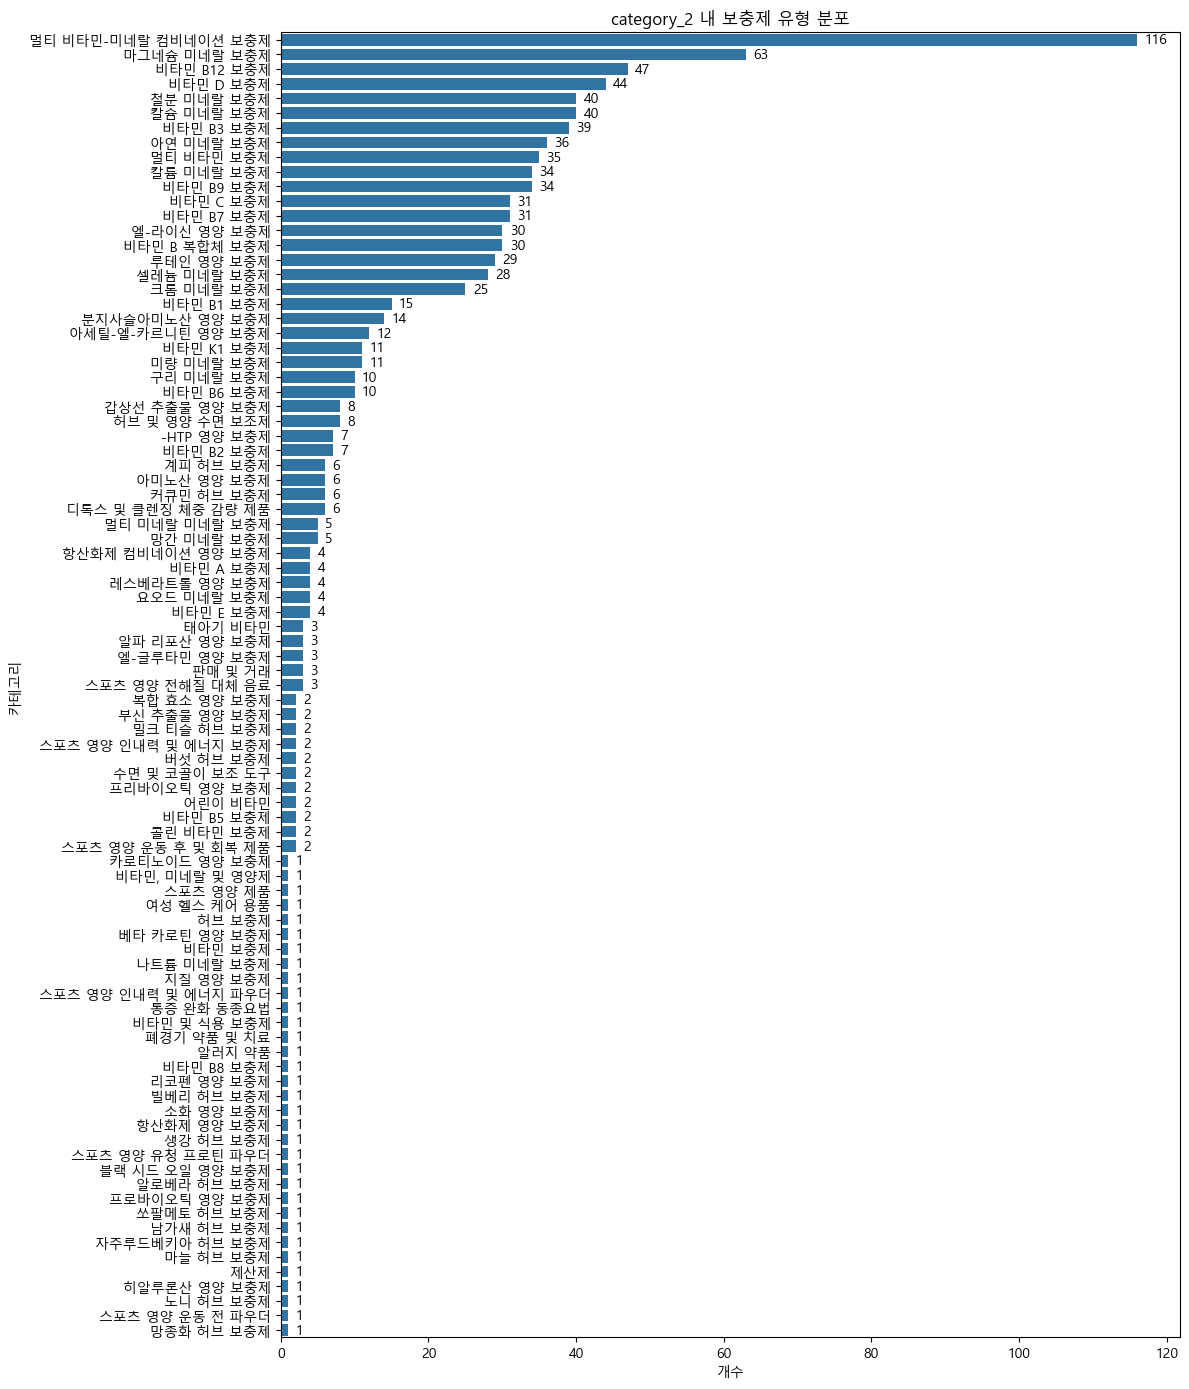

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df_filtered = df[df['category_2'].notna()].copy()

plt.figure(figsize=(12, 14))
ax = sns.countplot(data=df_filtered, y='category_2', order=df_filtered['category_2'].value_counts().index)

plt.title('category_2 내 보충제 유형 분포')
plt.xlabel('개수')
plt.ylabel('카테고리')

# 각 막대 옆에 개수 텍스트 표시
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,  # x, y 좌표
            int(width),  # 텍스트 내용 (개수)
            va='center')  # 수직 정렬

plt.tight_layout()
plt.show()

# PM님이 터 전처리에서 사용하는 분류체계를 사용하는게 더 좋을 것 같아서 이 분류는 사용하지 않는 것으로 정했습니다.

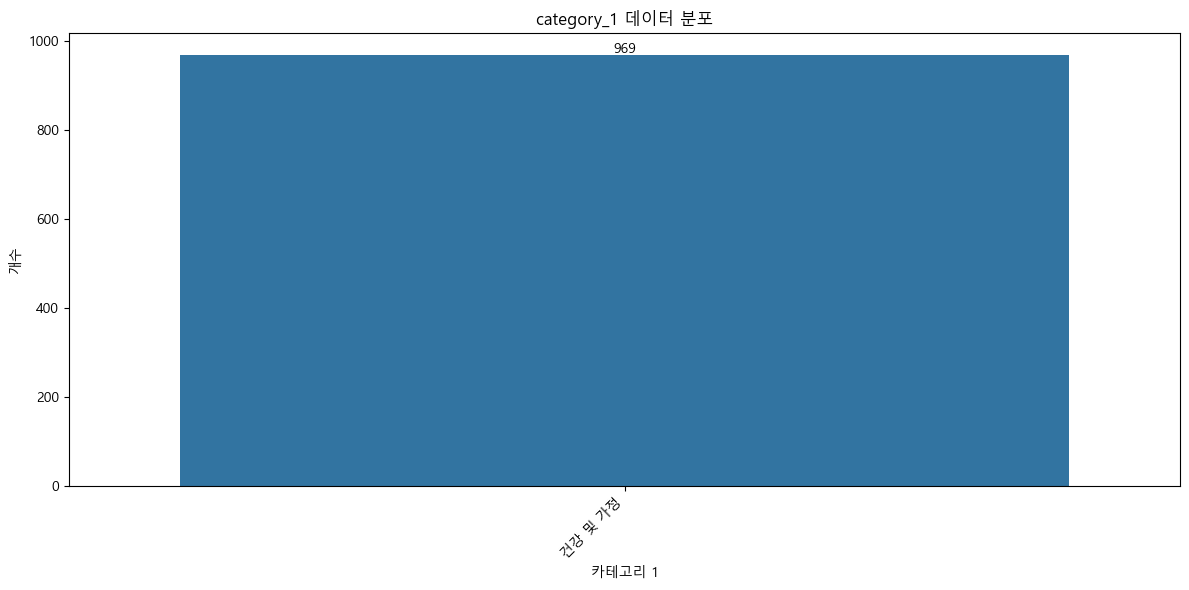

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

# category_1 컬럼에 결측치가 있으면 제거 (필요시)
df_filtered = df[df['category_1'].notna()].copy()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_filtered, x='category_1', order=df_filtered['category_1'].value_counts().index)

plt.title('category_1 데이터 분포')
plt.xlabel('카테고리 1')
plt.ylabel('개수')

# 막대 위에 데이터 개수 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 5,  # x, y 좌표
            int(height),  # 텍스트 내용 (개수)
            ha='center')  # 수평 정렬

plt.xticks(rotation=45, ha='right')  # x축 라벨 각도 조절 (길면 보기 편하게)
plt.tight_layout()
plt.show()
# 분포는 비율로 보여주는게 좋다.
# 데이터 종류가 1개라서 사용할 일 없을 것 같다.

In [8]:
none_both_df = df[(df['important_info'].isna()) | (df['important_info'] == 'None')]

print(none_both_df)


Empty DataFrame
Columns: [url, title, important_info, table_info, reviews, average_rating, total_reviews, rating_distribution, features, price, image_link, detail_dict, sales_ranks, url_clean]
Index: []


In [ ]:
df.loc[500]

url                            https://www.amazon.com/-/ko/dp/B08Z7B9ZCZ
title                  Trace Minerals 이온 마그네슘 400mg - 뇌 건강 및 에너지 지원 보...
important_info         중요 정보\n재료\n마그네슘 400mg, 염화물 1100mg, 나트륨 5mg, 칼륨...
table_info             ['브랜드 | Trace Minerals', '상품 양식 | 드롭', '기본 보충제...
reviews                [{'date': '2025년5월8일', 'stars': 5, 'text': "I ...
average_rating                                                       4.3
total_reviews                                                     3438.0
rating_distribution    {'5 stars': 71, '4 stars': 12, '3 stars': 7, '...
features               ['순수 이온 마그네슘 보충제: 이 보충제의 마그네슘은 미네랄이 풍부한 바닷물에서 ...
price                                                                NaN
image_link             https://m.media-amazon.com/images/I/51prhfBj2D...
detail_dict            {'제품 치수': '6.99 x 10.8 x 17.15 인치; 540 그램', '처...
sales_ranks            [{'category': '건강 및 가정', 'rank': 9909}, {'cate...
url_clean                      https://www.amazon.c

In [11]:
import pandas as pd
import numpy as np
import ast
import json
import os

df = pd.read_csv('data.csv')

# URL 문자열 소문자화 + 공백 제거 후 중복 제거
df['url_clean'] = df['url'].str.strip().str.lower()
df = df.drop_duplicates(subset=['url_clean'])
df = df.reset_index(drop=True)

# 문자열을 리스트로 변환
def try_literal_eval(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return x
    else:
        return x

df['sales_ranks'] = df['sales_ranks'].apply(try_literal_eval)

# 첫 번째 딕셔너리에서 category와 rank 추출
df['category_1'] = df['sales_ranks'].apply(lambda x: x[0]['category'] if isinstance(x, list) and len(x) > 0 else None)
df['rank_1'] = df['sales_ranks'].apply(lambda x: x[0]['rank'] if isinstance(x, list) and len(x) > 0 else None)

# 컬럼명 변경
df.rename(columns={'rank_1': 'sales_rank'}, inplace=True)

# 특정 카테고리 제외
df = df[~df['category_1'].isin(['애완동물 용품', '식료품 및 고급 요리', '피부미용 및 퍼스널 케어'])]

# sales_rank 기준 정렬
df_sorted = df.sort_values(by='sales_rank', ascending=True).reset_index(drop=True)

# 상위 100개 추출
top_n = 100
result = df_sorted[['title', 'url', 'image_link', 'sales_rank']].head(top_n).to_dict(orient='records')

# 현재 경로에 저장
save_path = 'processed_data.json'

with open(save_path, 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=2)

print(f'✅ 저장 완료: {save_path}')

print(df['sales_rank'].head(5))

✅ 저장 완료: processed_data.json
0     361.0
1    3114.0
2     151.0
3    5994.0
4      44.0
Name: sales_rank, dtype: float64
